<br><br><br><br><br>

# The Scientific Python Ecosystem

<br><br><br><br><br>

<br><br><br><br><br>

### Part 1: Why Python in particle physics?

<br><br><br><br><br>

<br>

<p style="font-size: 1.25em">I could point to its broad adoption as a programming language...</p>

<center><img src="img/pypl-2019.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">But it is more relevant to point to its use in data analysis.</p>

<center><img src="img/python-r-cpp-googletrends-dataset.png" width="75%"></center>

<br>

<center><img src="img/python-r-cpp-googletrends-machinelearning.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">It's hard to overstate the scale of these communities.</p>

<center><img src="img/root-spark-pandas-google-trends.png" width="75%"></center>

<br>

<p style="font-size: 1.1em">There is value in adopting popular tools: every question/error message is googlable...</p>

<br>

<p style="font-size: 1.25em">Python is widespread in astronomy: LIGO analysis publicly shared in Jupyter...</p>

<table width="100%"><tr style="background: white"><td><img src="img/mentions-of-programming-languages.png" width="100%"></td><td><img src="img/ligo-notebook.png" width="100%"></td></tr></table>

<p style="font-size: 1.25em">And it is the language of choice for some—but not all—LHC experiments.</p>

<center><img src="img/github-cmssw-lin.png" width="70%"></center>

<center><img src="img/github-alice-lin.png" width="70%"></center>

<p style="font-size: 1.25em">(Can't measure ATLAS and LHCb because of private repos on GitLab.)</p>

<br>

<img src="img/commute-by-plane.png" width="65%"> _(Stolen from Jake Vanderplas.)_

<br>

<br><br>

<p style="font-size: 1.25em; font-weight: bold">Drive to the airport, then take a plane:</p>

   * Not everything needs to be fast, only the part that scales with the number of events (or other large number, like number of histogram bins or MC toys). Most analysis code is bookkeeping.
   * Need to step up from interactive tinkering to full-scale analysis __*in small steps*__. Rewriting (and debugging) for speed considered harmful.

<br><br>

In [1]:
# Example: code to compute a fractal (calendar/mousepad/T-shirt...).
import time, numpy

def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_python(800, 1200)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (800 * 1200)))

11524.2138504982 ns per pixel


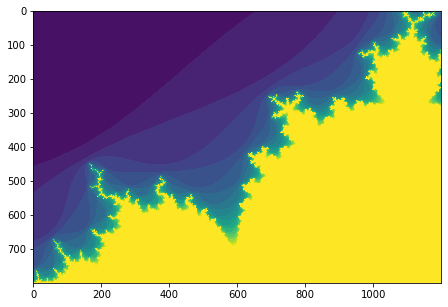

In [2]:
# Pretty, isn't it?

%matplotlib inline
import matplotlib.pyplot
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 5)); ax.imshow(fractal);

In [3]:
# REMINDER: the original code...


def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)



    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal





In [4]:
# 100× faster...
import numba

def run_numba(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    return tight_loop(height, width, maxiterations, c, fractal)
@numba.jit
def tight_loop(height, width, maxiterations, c, fractal):
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_numba(3200, 4800)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (3200 * 4800)))

125.85092335939407 ns per pixel


<br><br>

<p style="font-size: 1.25em">The "catch" is that code in the loop must be purely numerical: arrays and basic number types.</p>

<br>

<p style="font-size: 1.25em">It is semantically equivalent to C code and the <tt>@numba.jit</tt> compiles it.</p>

<br>

<p style="font-size: 1.25em">So... why not just write C code? If you developed your analysis in interactive Python, in a notebook or command prompt, it's easier (less buggy) to exorcise a few non-numerical structures than translate everything to C or C++.</p>

<br>

<br><br>

<p style="font-size: 1.25em"><b>Drive/bike/skateboard on your daily commute:</b> do exploration and problem-solving in Python because it has simple data structures, doesn't seg-fault, and dumps stack traces...</p>

<br>

<p style="font-size: 1.25em"><b>Fly to Europe:</b> hyper-optimize the loop that scales with big numbers so that you can finish analyzing your 100 TB this year...</p>

<br>

<p style="font-size: 1.25em; text-align: right; margin-right: 10%">... by replacing critical code <i><b>in small steps</b></i>.</p>

<p style="font-size: 1.25em">Rewriting the loop in C++ is <i>not</i> the easiest/best way to speed it up. (See <a href="misc-fractal.ipynb">misc-fractal.ipynb</a>.)</p>

| Method                                     | time (ns/px) | speedup |
|:-------------------------------------------|-------------:|--------:|
| Pure Python                                        | 12000   |    1× |
| Vectorized Numpy                                   |   368   |   30× |
| Vectorized CuPy (run on GPU)                       |    81   |  150× |
| Compiled by Numba                                  |   136   |   90× |
| Compiled & parallelized by Numba                   |    45   |  250× |
| Compiled & run on GPU by Numba                     |     7.8 | 1500× |
| Parallelized by Dask                               |   238   |   50× |
| Parallelized by Dask, compiled by Numba            |    48   |  250× |
| Partially rewritten in Cython (Python/C++ hybrid)  |  1485   |    8× |
| Completely rewritten in Cython (pure C++)          |    99   |  120× |
| Completely rewritten in pybind11 (pure C++)        |    98   |  120× |
| Completely rewritten in ROOT (pure C++ with `-O0`) |   379   |   32× |

<br>

<center><img src="img/numpy-logo.png" width="35%"></center>

<br>

<p style="font-size: 1.25em">Numpy is the common (in-memory) data format for scientific Python.</p>

<br>

<p style="font-size: 1.25em">Nearly every package can input/output data as Numpy arrays.</p>

<br>

<p style="font-size: 1.25em">Numpy also has a suite of functions for doing calculations a whole array at a time: vectorized in the sense of a <b>S</b>ingle (Python) <b>I</b>nstruction on <b>M</b>ultiple <b>D</b>ata.</p>

In [64]:
# Numpy arrays of physics data:
import uproot
arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")

print("Names of arrays in this dict:\n")
print(list(arrays), "\n\n\n")

arrays

Names of arrays in this dict:

['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'] 





{'Type': <ObjectArray [b'GT' b'TT' b'GT' ... b'TT' b'GT' b'GG'] at 0x7f658b4dd630>,
 'Run': array([148031, 148031, 148031, ..., 148029, 148029, 148029], dtype=int32),
 'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 'eta1': array([-1.21769, -1.05139, -1.05139, ..., -1.57044, -1.57044, -1.57044]),
 'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275]),
 'Q1': array([ 1, 

In [65]:
# Take arrays out of the dict and make each one a variable.
for n in arrays:
    exec(f"{n} = arrays['{n}']")

# Example array: energy of first muon in each event
E1

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [7]:
# Compute pT of all muon pairs:

import numpy

pt = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2)
pt

array([ 7.17219282,  6.13819068,  5.81117254, ..., 43.50036668,
       44.28500082, 44.19520441])

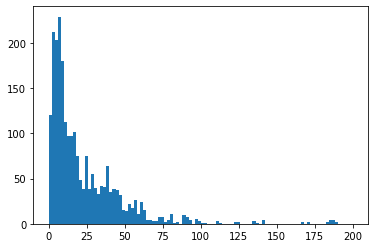

In [8]:
# And __LOOK__:

matplotlib.pyplot.hist(pt, bins=100, range=(0, 200));

In [9]:
# Compute p of all muon pairs:

p = numpy.sqrt(pt**2 + (pz1 + pz2)**2)
p

array([116.61271581, 117.90010197, 117.36645448, ..., 230.90205217,
       232.63405045, 232.88789491])

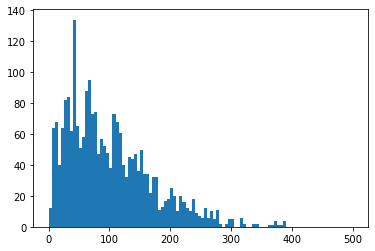

In [10]:
# And __LOOK__:

matplotlib.pyplot.hist(p, bins=100, range=(0, 500));

In [11]:
# Compute mass of all muon pairs:

mass = numpy.sqrt((E1 + E2)**2 - p**2)
mass

array([82.46269156, 83.62620401, 83.30846467, ..., 95.96547966,
       96.49594382, 96.65672765])

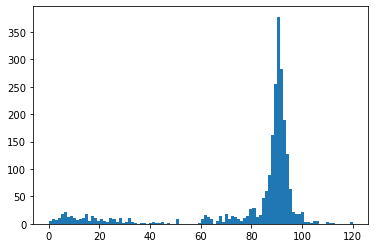

In [12]:
# And __LOOK__:

matplotlib.pyplot.hist(mass, bins=100, range=(0, 120));

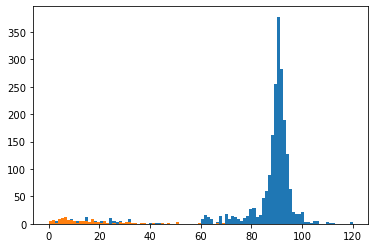

In [13]:
# Start adding cuts, exploring different regions, etc.

matplotlib.pyplot.hist(mass[Q1 != Q2], bins=100, range=(0, 120));
matplotlib.pyplot.hist(mass[Q1 == Q2], bins=100, range=(0, 120));

<br><br>

<p style="font-size: 1.25em">This is the point: you calculate <i>one thing</i> and then you <i>LOOK</i> at the result.</p>

<br>

<p style="font-size: 1.25em">Array-at-a-time logic gives you a statistical view of each <i>step</i> in your calculation as you develop it.</p>

Welcome to JupyROOT 6.18/00


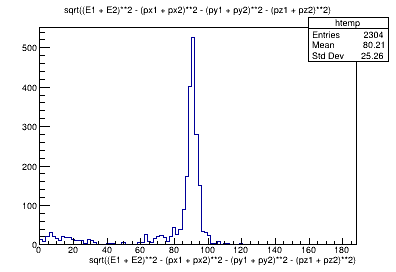

In [14]:
# As physicists, we know this...

import ROOT
canvas = ROOT.TCanvas("canvas", "", 400, 300)
file = ROOT.TFile("data/Zmumu.root")
tree = file.Get("events")
tree.Draw("sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)")
canvas.Draw()

<br><br><br>

<p style="font-size: 1.25em">The hard part is turning those <tt>TTree::Draw</tt> expressions into a full analysis.</p>

<br>

<p style="font-size: 1.25em">How many of you have started with <tt>TTree::Draw</tt> and had to rewrite everything as a C++ loop?</p>

<br>

<p style="font-size: 1.25em">The idea of using Python in for science is to do initial exploration and then scale up "enough" in a single environment.</p>

<br><br><br>

<br><br><br><br><br>

### Part 2: There's an app for that

<br><br><br><br><br>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<br><br>

<p style="font-size: 1.25em">Much of what we do, as physicists, are not new problems. You can learn a lot by attempting to write an algorithm yourself, but eventually you'll want to plug together functions from established libraries (that you understand!).</p>

<br>

<p style="font-size: 1.25em"><b>Wikipedia</b> (to learn the names of things) + <b>StackOverflow</b> (to find common solutions) is a good way to develop analysis code.</p>

<br>

<p style="font-size: 1.25em">Most of these solutions come in Numpy-shaped pieces.</p>

<br><br>

<br><br>

<p style="font-size: 100px"><img src="img/scipy-logo.png" width="45%" style="vertical-align: middle"> = <img src="img/numerical-recipes.jpg" width="25%" style="vertical-align: middle"></p>

<br><br>

<br>

<p style="font-size: 1.25em">SciPy was originally the "all in one" scientific package, but today, much of the development is outside of SciPy.</p>

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase, including **Numeric**. |
| 2003 | **Matplotlib** released (at that time, one of many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| 2005 | **Numpy** unified features of **Numeric** and **Numarray** and became the common array library. |
| 2008 | **Pandas** first released. |
| 2010 | **Scikit-Learn** first released. |
| 2011 | **AstroPy** first released. |
| 2012 | **Anaconda** first released. |
| 2014 | **Jupyter** first released. |
| 2015 | **Keras** first released. |

<center><img src="img/scipy-docs.png" width="60%"></center>

In [19]:
import scipy.stats

?scipy.stats

Type:        module
String form: <module 'scipy.stats' from '/home/pivarski/miniconda3/lib/python3.7/site-packages/scipy/stats/__init__.py'>
File:        ~/miniconda3/lib/python3.7/site-packages/scipy/stats/__init__.py
Docstring:  
Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (

In [20]:
?scipy.stats.crystalball

Signature:       scipy.stats.crystalball(*args, **kwds)
Type:            crystalball_gen
String form:     <scipy.stats._continuous_distns.crystalball_gen object at 0x7f659b45a588>
File:            ~/miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
Crystalball distribution

As an instance of the `rv_continuous` class, `crystalball` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(beta, m, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, beta, m, loc=0, scale=1)
    Probability density function.
logpdf(x, beta, m, loc=0, scale=1)
    Log of the probability density function.
cdf(x, beta, m, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, beta, m, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, beta, m, loc=0, scale=1)
    Survival function  (also defined as

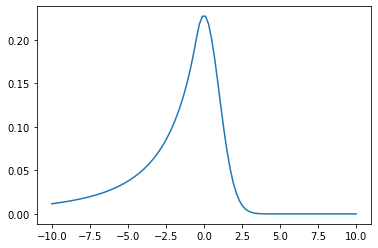

In [71]:
x = numpy.linspace(-10, 10, 100)
y = scipy.stats.crystalball.pdf(x, beta=0.5, m=3)     # logpdf, cdf

matplotlib.pyplot.plot(x, y);

In [72]:
scipy.stats.crystalball.rvs(beta=0.5, m=3, size=200)

array([-6.26183568e-01, -6.79607901e+00, -1.41270317e+01, -7.15966403e-01,
       -3.02380442e+00, -3.24727972e+00,  1.04613537e+00, -5.24554244e+00,
       -1.15580178e+01, -3.64652699e-01,  2.29107489e-01,  8.80499146e-01,
       -6.58121661e+00, -7.99001320e+00, -4.64511799e-01,  2.44654230e-01,
       -4.92808718e+00,  1.12471063e+00, -3.30038822e+00, -1.13915912e+00,
        1.87253674e-01,  5.21244264e-01, -8.28784508e-01, -3.90491206e-01,
       -1.83004674e+01, -2.83115017e+00, -5.16444649e+00, -2.06866247e-01,
       -1.26138564e+01, -2.13286932e+00, -1.45948652e+00, -7.35063061e+00,
       -7.28397196e+00, -1.56447638e+01, -8.77637231e-01,  2.18161609e+00,
       -4.61784135e+00, -5.85277185e+00, -7.18399857e-01, -4.59503578e-02,
       -1.20782854e+00,  1.44322916e+00,  7.71725367e-01, -1.70136063e+00,
        2.24613708e+00, -5.53753451e+00, -6.57810302e-01, -6.07217886e+00,
       -1.09375846e+00, -1.13069466e+01, -4.54915581e+00, -1.44296404e+00,
       -1.54787426e+00, -

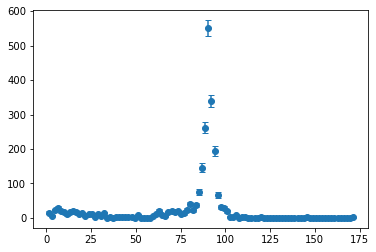

In [74]:
masses = uproot.open("data/Zmumu.root")["events"].array("M")

y, edges = numpy.histogram(masses, bins=100)
yerr = numpy.sqrt(y)

# the middle of each bin
x = (edges[1:] + edges[:-1])/2

matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

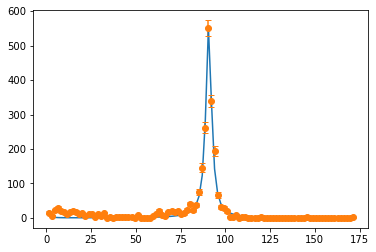

In [75]:
import scipy.optimize

def f(x, a, b, c, d):
    return a*scipy.stats.cauchy.pdf(x, b, c) + d/x**2

parameters, errors = scipy.optimize.curve_fit(f, x[y > 0], y[y > 0], sigma=yerr[y > 0])

matplotlib.pyplot.plot(x, f(x, *parameters))
matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

<br><br><br><br><br>

<p style="font-size: 1.25em"><b>Five minute challenge:</b> using only commands from the previous cell, plot the fit residuals.</p>

<br><br><br><br><br>

<center><img src="img/iminuit.png" width="80%"></center>

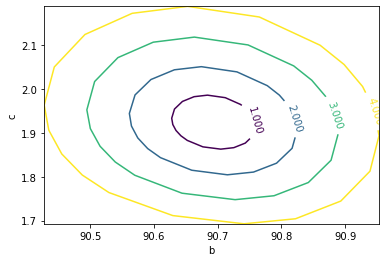

In [78]:
import iminuit

def chi2(a, b, c, d):
    return ((y[y > 0] - f(x[y > 0], a, b, c, d))**2 / yerr[y > 0]**2).sum()

m = iminuit.Minuit(chi2, errordef=1,
                   a=3350, b=91, c=2, d=30,
                   error_a=100, error_b=1, error_c=0.1, error_d=10)
m.migrad()
m.hesse()
m.minos()
m.draw_mncontour("b", "c", nsigma=4);

<br><br><br>

<center><img src="img/scikit-learn-logo.png" width="40%"></center>

<br><br><br>

<br><br><br>

<p style="font-size: 1.25em">To branch out in a modular way, SciPy introduced the idea of "SciKits"—separate packages from SciPy that have a similar interface.</p>

<br>

<p style="font-size: 1.25em">The most famous of these is Scikit-Learn, a package that gathers all (pre-deep learning) machine learning algorithms under one roof.</p>


<br><br><br>

<img src="img/scikit-learn-estimators.png" width="95%">